# 분석 프로그래밍 프로젝트

### 20170479 정치외교학과 최현규

# 패키지 및 기본 데이터 입력

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
sns.set_style('whitegrid')

import gc  # garbage collection
from sklearn.cluster import KMeans  # k-means 군집분석
from sklearn.metrics import silhouette_score  # 군집분석 평가를 위한 silhouette 값 계산

pd.set_option('max_columns', 20, 'max_rows', 20)

In [4]:
#matplotlib 한글깨짐 지원
import platform

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False)  

In [358]:
!pip install yellowbrick

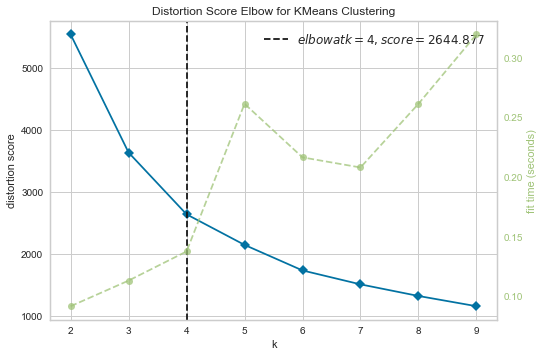

H:\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x00000201BACABC08>,
                 k=None, locate_elbow=True, metric='distortion', model=None,
                 timings=True)

In [359]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=0), X, k=(2,10))

In [5]:
고객 = pd.read_csv('L사_고객정보.csv')
상품 = pd.read_csv('L사_상품정보.csv')
거래 = pd.read_csv('L사_거래정보.csv')

In [6]:
상품.pd_c = 상품.pd_c.astype(str).str.zfill(4)
df = pd.merge(거래, 고객).merge(상품, on='pd_c')
df.de_dt = df.de_dt.astype(str).astype('datetime64')
df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582304,53632,75835,1,A01,0258,2019-08-14,10:00,77040,2,M,50,Computers,Computer Accessories,Printer Inks / Toners
582305,1499,92574,4,A01,1303,2019-09-04,08:09,29000,1,F,50,Sport Fashion,Women's Climbing Clothing,Women's Climbing Vests
582306,58443,103525,1,A01,0263,2019-09-18,10:30,568000,1,F,30,Computers,Computers / Laptops,Tablet PCs
582307,21232,103476,1,A01,0263,2019-09-18,01:38,362500,1,F,30,Computers,Computers / Laptops,Tablet PCs


In [7]:
df['price'] = df['buy_am'] / df['buy_ct']
df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,price
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,10900.0
1,39423,105124,10,A03,0182,2019-09-20,17:26,21800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,10900.0
2,39423,89469,2,A03,0182,2019-09-01,03:32,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,12900.0
3,39423,88436,1,A03,0182,2019-08-30,17:15,25800,2,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,12900.0
4,18362,50872,3,A03,0182,2019-07-15,09:46,31600,4,F,40,Chilled Foods,Chilled Instant Foods,Chilled Soups,7900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582304,53632,75835,1,A01,0258,2019-08-14,10:00,77040,2,M,50,Computers,Computer Accessories,Printer Inks / Toners,38520.0
582305,1499,92574,4,A01,1303,2019-09-04,08:09,29000,1,F,50,Sport Fashion,Women's Climbing Clothing,Women's Climbing Vests,29000.0
582306,58443,103525,1,A01,0263,2019-09-18,10:30,568000,1,F,30,Computers,Computers / Laptops,Tablet PCs,568000.0
582307,21232,103476,1,A01,0263,2019-09-18,01:38,362500,1,F,30,Computers,Computers / Laptops,Tablet PCs,362500.0


# data cleansing

In [8]:
df['buy_ct'] = np.where(df.buy_ct == 0, 1, df.buy_ct)

df = df.query('buy_am != 0')

# 고객특성 데이터프레임 생성

In [9]:
고객특성 = pd.DataFrame({'clnt_id': df.clnt_id.unique()})
고객특성

,clnt_id
0,21922
1,39423
2,18362
3,48969
4,18478
...,...
11261,15146
11262,53632
11263,58443
11264,21232


In [10]:
f = df.groupby('clnt_id')['buy_am'].agg([
    ('총구매액',np.sum), 
    ('구매건수', np.size), 
    ('평균구매액', lambda x: np.round(np.mean(x))),
    ('최대구매액', np.max)
]).reset_index()
고객특성 = 고객특성.merge(f, how='left'); 고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액
0,21922,79980,13,6152,13900
1,39423,676262,134,5047,55600
2,18362,802720,117,6861,55600
3,48969,388898,100,3889,25800
4,18478,1998300,32,62447,711000
...,...,...,...,...,...
11261,15146,52800,1,52800,52800
11262,53632,77040,1,77040,77040
11263,58443,568000,1,568000,568000
11264,21232,362500,1,362500,362500


In [11]:
now = df.de_dt.max()+pd.DateOffset(days=1)
recency = (df.groupby('clnt_id')['de_dt']
           .agg(lambda x,y: (y - x).min().days, now).reset_index()
           .rename(columns={'de_dt':'구매 주기(R)'})
          )
recency
고객특성 = 고객특성.merge(recency, how='left'); 고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R)
0,21922,79980,13,6152,13900,11
1,39423,676262,134,5047,55600,1
2,18362,802720,117,6861,55600,1
3,48969,388898,100,3889,25800,4
4,18478,1998300,32,62447,711000,11
...,...,...,...,...,...,...
11261,15146,52800,1,52800,52800,57
11262,53632,77040,1,77040,77040,48
11263,58443,568000,1,568000,568000,13
11264,21232,362500,1,362500,362500,13


In [12]:
frequency =  df.groupby('clnt_id')['trans_id'].agg([('구매 빈도(F)', Series.nunique)]).reset_index()
고객특성 = 고객특성.merge(frequency, how='left'); 고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F)
0,21922,79980,13,6152,13900,11,6
1,39423,676262,134,5047,55600,1,23
2,18362,802720,117,6861,55600,1,22
3,48969,388898,100,3889,25800,4,12
4,18478,1998300,32,62447,711000,11,17
...,...,...,...,...,...,...,...
11261,15146,52800,1,52800,52800,57,1
11262,53632,77040,1,77040,77040,48,1
11263,58443,568000,1,568000,568000,13,1
11264,21232,362500,1,362500,362500,13,1


In [13]:
monetary = df.groupby('clnt_id')['buy_am'].agg([('총 구매액(M)', np.sum)]).reset_index()
고객특성 = 고객특성.merge(monetary, how='left'); 고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M)
0,21922,79980,13,6152,13900,11,6,79980
1,39423,676262,134,5047,55600,1,23,676262
2,18362,802720,117,6861,55600,1,22,802720
3,48969,388898,100,3889,25800,4,12,388898
4,18478,1998300,32,62447,711000,11,17,1998300
...,...,...,...,...,...,...,...,...
11261,15146,52800,1,52800,52800,57,1,52800
11262,53632,77040,1,77040,77040,48,1,77040
11263,58443,568000,1,568000,568000,13,1,568000
11264,21232,362500,1,362500,362500,13,1,362500


In [14]:
고객특성['총 구매액 분위'] = pd.qcut(고객특성['총 구매액(M)'],  [0, .1, .3, .5, .7, .9, .95, 1.], labels=[1,2,3,4,5,6,7])
고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위
0,21922,79980,13,6152,13900,11,6,79980,2
1,39423,676262,134,5047,55600,1,23,676262,5
2,18362,802720,117,6861,55600,1,22,802720,5
3,48969,388898,100,3889,25800,4,12,388898,4
4,18478,1998300,32,62447,711000,11,17,1998300,7
...,...,...,...,...,...,...,...,...,...
11261,15146,52800,1,52800,52800,57,1,52800,2
11262,53632,77040,1,77040,77040,48,1,77040,2
11263,58443,568000,1,568000,568000,13,1,568000,5
11264,21232,362500,1,362500,362500,13,1,362500,4


In [15]:
tsum = df.groupby('clnt_id')['buy_am'].sum()
visit = df.groupby('clnt_id')['de_dt'].nunique()

내점당구매액 = (tsum / visit).round(0).reset_index().rename(columns={0: '내점당 구매액'})
내점당구매액
고객특성 = 고객특성.merge(내점당구매액, how='left'); 고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위,내점당 구매액
0,21922,79980,13,6152,13900,11,6,79980,2,15996.0
1,39423,676262,134,5047,55600,1,23,676262,5,35593.0
2,18362,802720,117,6861,55600,1,22,802720,5,40136.0
3,48969,388898,100,3889,25800,4,12,388898,4,38890.0
4,18478,1998300,32,62447,711000,11,17,1998300,7,166525.0
...,...,...,...,...,...,...,...,...,...,...
11261,15146,52800,1,52800,52800,57,1,52800,2,52800.0
11262,53632,77040,1,77040,77040,48,1,77040,2,77040.0
11263,58443,568000,1,568000,568000,13,1,568000,5,568000.0
11264,21232,362500,1,362500,362500,13,1,362500,4,362500.0


In [16]:
구매상품 = df['pd_c']
고객특성 = pd.concat([고객특성, 구매상품], axis=1); 고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위,내점당 구매액,pd_c
0,21922.0,79980.0,13.0,6152.0,13900.0,11.0,6.0,79980.0,2,15996.0,0182
1,39423.0,676262.0,134.0,5047.0,55600.0,1.0,23.0,676262.0,5,35593.0,0182
2,18362.0,802720.0,117.0,6861.0,55600.0,1.0,22.0,802720.0,5,40136.0,0182
3,48969.0,388898.0,100.0,3889.0,25800.0,4.0,12.0,388898.0,4,38890.0,0182
4,18478.0,1998300.0,32.0,62447.0,711000.0,11.0,17.0,1998300.0,7,166525.0,0182
...,...,...,...,...,...,...,...,...,...,...,...
582304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0258
582305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1303
582306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0263
582307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0263


In [17]:
고객특성['내점당 구매액'].quantile([
    .0,
    .1, 
    .3, 
    .5, 
    .7, 
    .9, 
    .93, 
    .95, 
    .97, 
    .99, 
    .995, 
    .9975, 
    .999, 
    .99979,
    1.0]).astype(int)

0.00000           100
0.10000         18177
0.30000         31632
0.50000         43449
0.70000         63532
0.90000        130393
0.93000        158826
0.95000        196000
0.97000        278025
0.99000        583189
0.99500        900057
0.99750       1196830
0.99900       1675968
0.99979       3204187
1.00000    1639397046
Name: 내점당 구매액, dtype: int32

In [18]:
고객특성['내점당 구매액 분위'] = pd.qcut(고객특성['내점당 구매액'],  [
    .0,
    .1, 
    .3, 
    .5, 
    .7, 
    .9, 
    .93, 
    .95, 
    .97, 
    .99, 
    .995, 
    .9975, 
    .999, 
    .99979], labels= [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13])
고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위,내점당 구매액,pd_c,내점당 구매액 분위
0,21922.0,79980.0,13.0,6152.0,13900.0,11.0,6.0,79980.0,2,15996.0,0182,1
1,39423.0,676262.0,134.0,5047.0,55600.0,1.0,23.0,676262.0,5,35593.0,0182,3
2,18362.0,802720.0,117.0,6861.0,55600.0,1.0,22.0,802720.0,5,40136.0,0182,3
3,48969.0,388898.0,100.0,3889.0,25800.0,4.0,12.0,388898.0,4,38890.0,0182,3
4,18478.0,1998300.0,32.0,62447.0,711000.0,11.0,17.0,1998300.0,7,166525.0,0182,7
...,...,...,...,...,...,...,...,...,...,...,...,...
582304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0258,NaN
582305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1303,NaN
582306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0263,NaN
582307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0263,NaN


# 최근_데이터 생성

In [19]:
df = df.merge(df.groupby('clnt_id')['de_dt'].agg([('최근구매일', np.max)]).reset_index())
df

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,price,최근구매일
0,21922,104999,3,A03,0182,2019-09-20,12:41,10900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Soups,10900.0,2019-09-20
1,21922,104999,4,A03,0178,2019-09-20,12:41,9900,1,F,50,Chilled Foods,Chilled Instant Foods,Chilled Noodles,9900.0,2019-09-20
2,21922,102455,3,A03,1584,2019-09-18,21:07,2990,1,F,50,Vegetables,Leaf Vegetables,Onions,2990.0,2019-09-20
3,21922,102455,1,A03,0943,2019-09-18,21:07,11160,1,F,50,Meats,Domestic Beefs,Domestic Beefs - Rounds,11160.0,2019-09-20
4,21922,102455,5,A03,1566,2019-09-18,21:07,3890,1,F,50,Vegetables,Fruit Vegetables,Cucumbers,3890.0,2019-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581778,15146,68684,1,A01,1273,2019-08-05,10:58,52800,1,M,50,Sport Fashion,Men's Climbing Clothing,Men's Climbing Bodysuits,52800.0,2019-08-05
581779,53632,75835,1,A01,0258,2019-08-14,10:00,77040,2,M,50,Computers,Computer Accessories,Printer Inks / Toners,38520.0,2019-08-14
581780,58443,103525,1,A01,0263,2019-09-18,10:30,568000,1,F,30,Computers,Computers / Laptops,Tablet PCs,568000.0,2019-09-18
581781,21232,103476,1,A01,0263,2019-09-18,01:38,362500,1,F,30,Computers,Computers / Laptops,Tablet PCs,362500.0,2019-09-18


In [20]:
최근_구매일 = df.groupby('clnt_id')['최근구매일'].unique().reset_index()
최근_구매일

,clnt_id,최근구매일
0,2,[2019-08-30T00:00:00.000000000]
1,9,[2019-09-14T00:00:00.000000000]
2,12,[2019-08-24T00:00:00.000000000]
3,20,[2019-09-30T00:00:00.000000000]
4,23,[2019-09-28T00:00:00.000000000]
...,...,...
11261,72373,[2019-09-16T00:00:00.000000000]
11262,72400,[2019-09-08T00:00:00.000000000]
11263,72410,[2019-09-19T00:00:00.000000000]
11264,72423,[2019-09-17T00:00:00.000000000]


In [21]:
최근구매상품 = df.query('de_dt == 최근구매일').groupby('clnt_id')['pd_c'].agg(lambda x: list(x)[0]).reset_index()
최근구매상품

,clnt_id,pd_c
0,2,1395
1,9,0565
2,12,0542
3,20,0943
4,23,1584
...,...,...
11261,72373,0870
11262,72400,0981
11263,72410,0670
11264,72423,0169


In [22]:
최근구매상품_금액 = df.query('de_dt == 최근구매일').groupby('clnt_id')['price'].agg([
    ('최근구매상품 금액',lambda x: list(x)[0])
]).reset_index()
최근구매상품_금액

,clnt_id,최근구매상품 금액
0,2,2850.0
1,9,3900.0
2,12,29900.0
3,20,13960.0
4,23,2290.0
...,...,...
11261,72373,16660.0
11262,72400,45810.0
11263,72410,57900.0
11264,72423,479700.0


In [23]:
최근구매중분류 = df.query('de_dt == 최근구매일').groupby('clnt_id')['clac_nm2'].agg([
    ('최근구매중분류',lambda x: list(x)[0])
]).reset_index()
최근구매중분류

,clnt_id,최근구매중분류
0,2,Instant Noodles
1,9,Imported Fruits
2,12,Domestic Fruits
3,20,Domestic Beefs
4,23,Leaf Vegetables
...,...,...
11261,72373,Kitchen Cookware
11262,72400,Processed Meats
11263,72410,Rice
11264,72423,Mobile Devices


In [24]:
최근구매소분류 = df.query('de_dt == 최근구매일').groupby('clnt_id')['clac_nm3'].agg([
    ('최근구매소분류',lambda x: list(x)[0])
]).reset_index()
최근구매소분류

,clnt_id,최근구매소분류
0,2,Ramens
1,9,Bananas
2,12,Peaches
3,20,Domestic Beefs - Rounds
4,23,Onions
...,...,...
11261,72373,Kitchen Knives / Scissors
11262,72400,Processed Meats for Ham
11263,72410,Rice
11264,72423,Cell Phones


# 거래특성 데이터프레임 생성

In [25]:
거래특성 = 최근_구매일.merge(최근구매중분류, on='clnt_id')
거래특성 = 거래특성.merge(최근구매소분류, on='clnt_id')
거래특성 = 거래특성.merge(최근구매상품, on='clnt_id')
거래특성 = 거래특성.merge(최근구매상품_금액, on='clnt_id')
거래특성['최근구매상품 금액 분위'] = pd.qcut(거래특성['최근구매상품 금액'],  [
    .0,
    .6725,
    .77,
    .8165,
    .855,
    .9275,
    .94,
    .9528,
    .9659,
    .9852,
    .9907,
    .993259,
    .9979,
    .99938
    ], labels= [1, 2, 3, 4, 5, 6, 7, 8,9,10,11,12,13])
거래특성

H:\Anaconda\lib\site-packages\pandas\core\algorithms.py:1035: RuntimeWarning: invalid value encountered in double_scalars
  return a + (b - a) * fraction


,clnt_id,최근구매일,최근구매중분류,최근구매소분류,pd_c,최근구매상품 금액,최근구매상품 금액 분위
0,2,[2019-08-30T00:00:00.000000000],Instant Noodles,Ramens,1395,2850.0,1
1,9,[2019-09-14T00:00:00.000000000],Imported Fruits,Bananas,0565,3900.0,1
2,12,[2019-08-24T00:00:00.000000000],Domestic Fruits,Peaches,0542,29900.0,3
3,20,[2019-09-30T00:00:00.000000000],Domestic Beefs,Domestic Beefs - Rounds,0943,13960.0,2
4,23,[2019-09-28T00:00:00.000000000],Leaf Vegetables,Onions,1584,2290.0,1
...,...,...,...,...,...,...,...
11261,72373,[2019-09-16T00:00:00.000000000],Kitchen Cookware,Kitchen Knives / Scissors,0870,16660.0,2
11262,72400,[2019-09-08T00:00:00.000000000],Processed Meats,Processed Meats for Ham,0981,45810.0,4
11263,72410,[2019-09-19T00:00:00.000000000],Rice,Rice,0670,57900.0,4
11264,72423,[2019-09-17T00:00:00.000000000],Mobile Devices,Cell Phones,0169,479700.0,10


In [26]:
거래특성 = 거래특성.dropna()

In [27]:
고객특성 = 고객특성.dropna()
고객특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위,내점당 구매액,pd_c,내점당 구매액 분위
0,21922.0,79980.0,13.0,6152.0,13900.0,11.0,6.0,79980.0,2,15996.0,0182,1
1,39423.0,676262.0,134.0,5047.0,55600.0,1.0,23.0,676262.0,5,35593.0,0182,3
2,18362.0,802720.0,117.0,6861.0,55600.0,1.0,22.0,802720.0,5,40136.0,0182,3
3,48969.0,388898.0,100.0,3889.0,25800.0,4.0,12.0,388898.0,4,38890.0,0182,3
4,18478.0,1998300.0,32.0,62447.0,711000.0,11.0,17.0,1998300.0,7,166525.0,0182,7
...,...,...,...,...,...,...,...,...,...,...,...,...
11261,15146.0,52800.0,1.0,52800.0,52800.0,57.0,1.0,52800.0,2,52800.0,1566,4
11262,53632.0,77040.0,1.0,77040.0,77040.0,48.0,1.0,77040.0,2,77040.0,1566,5
11263,58443.0,568000.0,1.0,568000.0,568000.0,13.0,1.0,568000.0,5,568000.0,1566,9
11264,21232.0,362500.0,1.0,362500.0,362500.0,13.0,1.0,362500.0,4,362500.0,1566,9


In [28]:
전체특성 = 고객특성.merge(거래특성, on='clnt_id')
전체특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위,내점당 구매액,pd_c_x,내점당 구매액 분위,최근구매일,최근구매중분류,최근구매소분류,pd_c_y,최근구매상품 금액,최근구매상품 금액 분위
0,21922.0,79980.0,13.0,6152.0,13900.0,11.0,6.0,79980.0,2,15996.0,0182,1,[2019-09-20T00:00:00.000000000],Chilled Instant Foods,Chilled Soups,0182,10900.0,1
1,39423.0,676262.0,134.0,5047.0,55600.0,1.0,23.0,676262.0,5,35593.0,0182,3,[2019-09-30T00:00:00.000000000],Imported Fruits,Bananas,0565,3290.0,1
2,18362.0,802720.0,117.0,6861.0,55600.0,1.0,22.0,802720.0,5,40136.0,0182,3,[2019-09-30T00:00:00.000000000],Tofu / Bean Sprouts,Tofu,1617,1600.0,1
3,48969.0,388898.0,100.0,3889.0,25800.0,4.0,12.0,388898.0,4,38890.0,0182,3,[2019-09-27T00:00:00.000000000],Fruit Vegetables,Cucumbers,1566,1080.0,1
4,18478.0,1998300.0,32.0,62447.0,711000.0,11.0,17.0,1998300.0,7,166525.0,0182,7,[2019-09-20T00:00:00.000000000],Chilled Instant Foods,Chilled Soups,0182,12900.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,15146.0,52800.0,1.0,52800.0,52800.0,57.0,1.0,52800.0,2,52800.0,1566,4,[2019-08-05T00:00:00.000000000],Men's Climbing Clothing,Men's Climbing Bodysuits,1273,52800.0,4
11239,53632.0,77040.0,1.0,77040.0,77040.0,48.0,1.0,77040.0,2,77040.0,1566,5,[2019-08-14T00:00:00.000000000],Computer Accessories,Printer Inks / Toners,0258,38520.0,3
11240,58443.0,568000.0,1.0,568000.0,568000.0,13.0,1.0,568000.0,5,568000.0,1566,9,[2019-09-18T00:00:00.000000000],Computers / Laptops,Tablet PCs,0263,568000.0,11
11241,21232.0,362500.0,1.0,362500.0,362500.0,13.0,1.0,362500.0,4,362500.0,1566,9,[2019-09-18T00:00:00.000000000],Computers / Laptops,Tablet PCs,0263,362500.0,10


# 상품특성 데이터프레임 생성(참고용)

In [29]:
상품특성_소분류 = df.groupby('pd_c')['clac_nm3'].unique()
상품특성_소분류 = 상품특성_소분류.reset_index()

In [30]:
상품특성_중분류 = df.groupby('pd_c')['clac_nm2'].unique()
상품특성_중분류 = 상품특성_중분류.reset_index()

In [32]:
상품특성_대분류 = df.groupby('pd_c')['clac_nm1'].unique()
상품특성_대분류 = 상품특성_대분류.reset_index()

In [33]:
상품_단가 = df.groupby('pd_c')['price'].mean()
상품특성_단가 = 상품_단가.reset_index()

In [34]:
상품특성 = 상품특성_대분류.merge(상품특성_중분류, on='pd_c')
상품특성 = 상품특성.merge(상품특성_소분류, on='pd_c')
상품특성 = 상품특성.merge(상품특성_단가, on='pd_c')
상품특성

,pd_c,clac_nm1,clac_nm2,clac_nm3,price
0,0001,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Automobile Oil / Additives],15946.000000
1,0002,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Car Lights],8960.000000
2,0003,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Car Paint],7142.857143
3,0004,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Filters],10500.000000
4,0005,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Wiper Blades],9804.953271
...,...,...,...,...,...
1656,1663,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's Cardigans],65834.726688
1657,1664,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's Sweaters / Pullover],73092.661123
1658,1665,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's Sweatshirts / Hoodies],27405.000000
1659,1666,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's T-shirts / Tops],28129.760087


In [35]:
가격_분위2 = 상품특성['price'].quantile([
    .0,
    .64,
    .73,
    .775,
    .81,
    .8773,
    .89,
    .9012,
    .9132,
    .93195,
    .93702,
    .9394,
    .94379,
    .945515
    ]).astype(int)
가격_분위2

0.000000          10
0.640000       18441
0.730000       31826
0.775000       44225
0.810000       63637
0.877300      129635
0.890000      158000
0.901200      196814
0.913200      276505
0.931950      575665
0.937020      899960
0.939400     1184049
0.943790     1676082
0.945515    32120763
Name: price, dtype: int32

In [36]:
상품특성["가격_단가_분위"] = pd.qcut(상품특성['price'],  [
    .0,
    .64,
    .73,
    .775,
    .81,
    .8773,
    .89,
    .9012,
    .9132,
    .93195,
    .93702,
    .9394,
    .94379,
    .945515
    ], labels= [1,2,3,4,5,6,7,8,9,10,11,12,13])
상품특성

,pd_c,clac_nm1,clac_nm2,clac_nm3,price,가격_단가_분위
0,0001,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Automobile Oil / Additives],15946.000000,1
1,0002,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Car Lights],8960.000000,1
2,0003,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Car Paint],7142.857143,1
3,0004,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Filters],10500.000000,1
4,0005,[Automotive Products],[Automotive Replacement Repair / Maintanance K...,[Wiper Blades],9804.953271,1
...,...,...,...,...,...,...
1656,1663,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's Cardigans],65834.726688,5
1657,1664,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's Sweaters / Pullover],73092.661123,5
1658,1665,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's Sweatshirts / Hoodies],27405.000000,2
1659,1666,[Women's Clothing],[Women's Upper Bodywear / Tops],[Women's T-shirts / Tops],28129.760087,2


## 거래특성 + 고객특성 = 최종 병합 데이터프레임

In [37]:
전체특성 = 고객특성.merge(거래특성, on='clnt_id')
전체특성 = 전체특성.dropna()
전체특성 = 전체특성.rename({'pd_c_y' : '최근_구매_상품_코드'}, axis=1)
del 전체특성['pd_c_x']

In [38]:
전체특성['내점당 구매액 분위'] = 전체특성['내점당 구매액 분위'].astype('int64')

### 전체특성 데이터프레임 정규화 사전작업

In [40]:
A = 전체특성.drop(columns=['총 구매액 분위',
                       '최근구매일',
                       '최근구매중분류',
                       '최근구매소분류',
                       '최근_구매_상품_코드',
                       '최근구매상품 금액 분위'
                      ])
A

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),내점당 구매액,내점당 구매액 분위,최근구매상품 금액
0,21922.0,79980.0,13.0,6152.0,13900.0,11.0,6.0,79980.0,15996.0,1,10900.0
1,39423.0,676262.0,134.0,5047.0,55600.0,1.0,23.0,676262.0,35593.0,3,3290.0
2,18362.0,802720.0,117.0,6861.0,55600.0,1.0,22.0,802720.0,40136.0,3,1600.0
3,48969.0,388898.0,100.0,3889.0,25800.0,4.0,12.0,388898.0,38890.0,3,1080.0
4,18478.0,1998300.0,32.0,62447.0,711000.0,11.0,17.0,1998300.0,166525.0,7,12900.0
...,...,...,...,...,...,...,...,...,...,...,...
11238,15146.0,52800.0,1.0,52800.0,52800.0,57.0,1.0,52800.0,52800.0,4,52800.0
11239,53632.0,77040.0,1.0,77040.0,77040.0,48.0,1.0,77040.0,77040.0,5,38520.0
11240,58443.0,568000.0,1.0,568000.0,568000.0,13.0,1.0,568000.0,568000.0,9,568000.0
11241,21232.0,362500.0,1.0,362500.0,362500.0,13.0,1.0,362500.0,362500.0,9,362500.0


# 특정 고객이 최근에 구매한 상품을 똑같이 구매한 고객들이 구매한 다른 상품 추천(전에 샀던 상품 포함)

In [41]:
최근구매상품_matrix = pd.pivot_table(전체특성, index='clnt_id', columns='최근구매소분류', values='최근_구매_상품_코드', 
                                aggfunc=lambda x: 1 if len(x) >= 1 else 0, fill_value=0)

print(최근구매상품_matrix.shape)
최근구매상품_matrix

(11243, 869)


최근구매소분류,Accessory Bags,Adhesive Tapes,Adhesives,Adult's Bed Covers and Skirts,Adult's Diapers,Adults' Bed Fillings,Adults' Bedding Sets,Adults' Duvet / Duvet Cover,Adults' Korean Style Mattress / Covers,Adults' Pads / Bed Spread,...,Women's Underwear Sets,Women's Vests,Women's Watches,Work Gloves,Wrapping Vegetables,Yellow Corvina Fish,Yoga Mats / Exercise Mats,Yoghurts / Chunggukjang Makers,Yogurt Drinks,Young Pumpkins
clnt_id,,,,,,,,,,,,,,,,,,,,,
2.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72373.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72400.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72410.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
K = 50

In [43]:
user_sim1 = cosine_similarity(최근구매상품_matrix, 최근구매상품_matrix)

In [44]:
user_sim1 = pd.DataFrame(user_sim1, 최근구매상품_matrix.index, 최근구매상품_matrix.index)
np.fill_diagonal(user_sim1.values, 2)

print(user_sim1.shape)
user_sim1

(11243, 11243)


clnt_id,2.0,9.0,12.0,20.0,23.0,24.0,29.0,38.0,40.0,41.0,...,72333.0,72340.0,72342.0,72356.0,72361.0,72373.0,72400.0,72410.0,72423.0,72424.0
clnt_id,,,,,,,,,,,,,,,,,,,,,
2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72373.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
72400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
72410.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0


In [45]:
knn = user_sim1.apply(lambda x,k: x.sort_values(ascending=False).index[:k+1], args=(K,)).T
knn

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
clnt_id,,,,,,,,,,,,,,,,,,,,,
2.0,2.0,15469.0,3277.0,32473.0,56270.0,7773.0,15447.0,38377.0,50611.0,28349.0,...,68697.0,15635.0,15207.0,56583.0,32018.0,68435.0,64677.0,56608.0,7470.0,42380.0
9.0,9.0,64617.0,61185.0,39522.0,6454.0,16532.0,33786.0,50189.0,37425.0,70223.0,...,20357.0,68113.0,37576.0,28186.0,33693.0,3996.0,50252.0,2156.0,57438.0,29465.0
12.0,12.0,66410.0,37377.0,58558.0,25451.0,42517.0,67737.0,58051.0,64406.0,395.0,...,24391.0,24289.0,24377.0,24353.0,24329.0,24328.0,24311.0,24305.0,24140.0,24294.0
20.0,20.0,31313.0,5847.0,21955.0,46340.0,1524.0,20973.0,37053.0,48519.0,52982.0,...,62348.0,67915.0,48808.0,30311.0,36681.0,36705.0,45936.0,59481.0,71400.0,39864.0
23.0,23.0,49084.0,52362.0,33956.0,55683.0,43624.0,43641.0,12530.0,39569.0,55653.0,...,65942.0,12488.0,55767.0,68240.0,20103.0,16590.0,46483.0,46475.0,61244.0,71081.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72373.0,72373.0,70691.0,38018.0,17223.0,47224.0,55396.0,61269.0,72424.0,24235.0,24285.0,...,24377.0,24353.0,24329.0,24328.0,24140.0,24159.0,24111.0,24137.0,23983.0,24009.0
72400.0,72400.0,17320.0,40353.0,33595.0,52443.0,59743.0,70666.0,37518.0,40387.0,28201.0,...,24190.0,24211.0,24195.0,24234.0,24172.0,24193.0,72424.0,24236.0,24245.0,24246.0
72410.0,72410.0,54094.0,5938.0,35757.0,15339.0,13908.0,39159.0,4941.0,35858.0,7094.0,...,63621.0,37251.0,45515.0,11372.0,24914.0,4567.0,43994.0,24235.0,23983.0,24234.0


In [46]:
N = 10

In [47]:
def top_n(x, n):
    candidate = 최근구매상품_matrix.filter(items=x[1:], axis=0).sum().sort_values(ascending=False).index.to_list()
    return [item for item in candidate][:n]

recommend_list_최근구매상품 = knn.apply(top_n, args=(N,), axis=1).reset_index().rename(columns={0:'recommend_items'})
recommend_list_최근구매상품

,clnt_id,recommend_items
0,2.0,"[Ramens, Young Pumpkins, General Snacks, Gener..."
1,9.0,"[Bananas, Young Pumpkins, Functional Rice, Gen..."
2,12.0,"[Peaches, Lipsticks / Lipliners, Seasoned Slic..."
3,20.0,"[Domestic Beefs - Rounds, Young Pumpkins, Garl..."
4,23.0,"[Onions, Young Pumpkins, Functional Rice, Gene..."
...,...,...
11238,72373.0,"[Kitchen Knives / Scissors, Lipsticks / Liplin..."
11239,72400.0,"[Processed Meats for Ham, Kids' Toothbrushes, ..."
11240,72410.0,"[Rice, Functional Milk, Bananas, Other Women's..."
11241,72423.0,"[Lipsticks / Lipliners, Seasoned Sliced Dried ..."


# RFM과 내점당 구매액 분위를 기반으로 segment 분할

In [48]:
A = 전체특성.drop(columns=['총 구매액 분위',
                       '최근구매일',
                       '최근구매중분류',
                       '최근구매소분류',
                       '최근구매상품 금액 분위',
                       '총구매액',
                       '구매건수',
                       '평균구매액',
                       '최대구매액',
                       '내점당 구매액',
                       '최근구매상품 금액',
                       '최근구매상품 금액 분위',
                       '최근_구매_상품_코드'
                      ])
A = A.astype('int64')

In [49]:
A.dtypes

clnt_id       int64
구매 주기(R)      int64
구매 빈도(F)      int64
총 구매액(M)      int64
내점당 구매액 분위    int64
dtype: object

In [50]:
X = A.iloc[:,1:].apply(lambda x: (x - x.mean()) / x.std(), axis=1) 
X

,구매 주기(R),구매 빈도(F),총 구매액(M),내점당 구매액 분위
0,-0.499875,-0.500000,1.500000,-0.500125
1,-0.500024,-0.499959,1.500000,-0.500018
2,-0.500019,-0.499967,1.500000,-0.500014
3,-0.500012,-0.499971,1.500000,-0.500017
4,-0.500001,-0.499995,1.500000,-0.500005
...,...,...,...,...
11238,-0.498623,-0.500745,1.499999,-0.500631
11239,-0.499221,-0.500441,1.500000,-0.500337
11240,-0.499981,-0.500023,1.500000,-0.499995
11241,-0.499971,-0.500037,1.500000,-0.499993


In [51]:
wss = []
sis = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wss = np.append(wss, kmeans.inertia_)
    sis = np.append(sis, silhouette_score(X, kmeans.labels_))

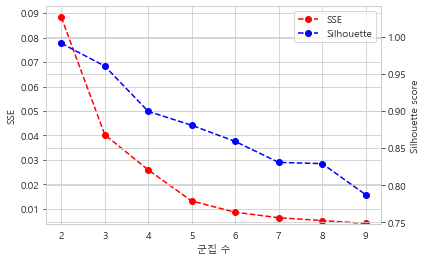

In [52]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

line1 = ax1.plot(np.arange(2,10), wss, 'ro--', label='SSE')
line2 = ax2.plot(np.arange(2,10), sis, 'bo--', label='Silhouette') 

ax1.set_ylim(wss.min()*0.95, wss.max()*1.05)
ax2.set_ylim(sis.min()*0.95, sis.max()*1.05)

ax1.set_xlabel('군집 수')
ax1.set_ylabel('SSE')
ax2.set_ylabel('Silhouette score')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.legend(lines, labels)
plt.show()

H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


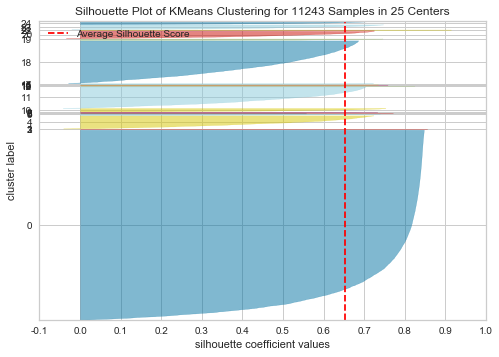

H:\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000001D57A0DF208>,
                     colors='yellowbrick', is_fitted='auto', model=None)

In [53]:
from yellowbrick.cluster import silhouette_visualizer

silhouette_visualizer(KMeans(25, random_state=0), X, colors='yellowbrick')

In [54]:
sns.reset_defaults()
%matplotlib inline


path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')
rc('axes', unicode_minus=False) 

In [55]:
best_k = 25

In [56]:
kmeans = KMeans(n_clusters=best_k, random_state=0)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=25, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [57]:
A['세그먼트'] = kmeans.labels_
A

,clnt_id,구매 주기(R),구매 빈도(F),총 구매액(M),내점당 구매액 분위,세그먼트
0,21922,11,6,79980,1,0
1,39423,1,23,676262,3,0
2,18362,1,22,802720,3,0
3,48969,4,12,388898,3,0
4,18478,11,17,1998300,7,0
...,...,...,...,...,...,...
11238,15146,57,1,52800,4,4
11239,53632,48,1,77040,5,11
11240,58443,13,1,568000,9,0
11241,21232,13,1,362500,9,0


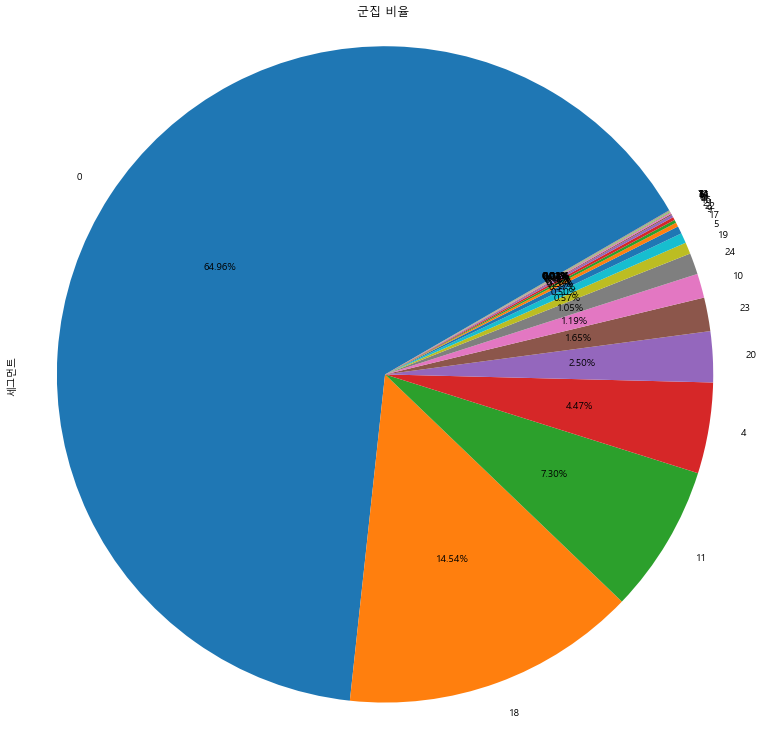

In [58]:
plt.figure(figsize=(6,6))
A.세그먼트.value_counts().plot.pie(autopct='%.2f%%', figsize=(13,13), 
                                      startangle=30, legend=False)
plt.title("군집 비율")
plt.axis('equal')
plt.show()

H:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  This is separate from the ipykernel package so we can avoid doing imports until


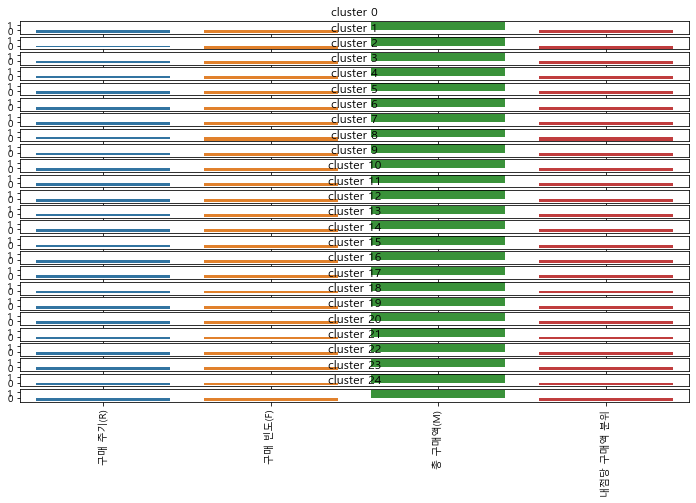

In [59]:
fig, ax = plt.subplots(best_k, 1, figsize=(12,7), sharex=True, sharey=True)
ax = ax.ravel()
plt.tight_layout()

for i in range(kmeans.n_clusters):
    ax[i].set_title('cluster %d' % i)
#    ax[i].bar(np.arange(X.columns.size), kmeans.cluster_centers_[i])
    sns.barplot(np.arange(X.columns.size), kmeans.cluster_centers_[i], ax=ax[i])
    ax[i].set_xticks(np.arange(X.columns.size))
    ax[i].set_xticklabels(X.columns, rotation=90)

In [60]:
세그먼트_추출 = A.groupby('clnt_id')['세그먼트'].agg([
    ('세그먼트',lambda x: x)
]).reset_index()
세그먼트_추출

,clnt_id,세그먼트
0,2,18
1,9,0
2,12,20
3,20,0
4,23,0
...,...,...
11238,72373,0
11239,72400,0
11240,72410,0
11241,72423,0


In [61]:
전체특성 = 전체특성.merge(세그먼트_추출, on='clnt_id')

In [62]:
전체특성

,clnt_id,총구매액,구매건수,평균구매액,최대구매액,구매 주기(R),구매 빈도(F),총 구매액(M),총 구매액 분위,내점당 구매액,내점당 구매액 분위,최근구매일,최근구매중분류,최근구매소분류,최근_구매_상품_코드,최근구매상품 금액,최근구매상품 금액 분위,세그먼트
0,21922.0,79980.0,13.0,6152.0,13900.0,11.0,6.0,79980.0,2,15996.0,1,[2019-09-20T00:00:00.000000000],Chilled Instant Foods,Chilled Soups,0182,10900.0,1,0
1,39423.0,676262.0,134.0,5047.0,55600.0,1.0,23.0,676262.0,5,35593.0,3,[2019-09-30T00:00:00.000000000],Imported Fruits,Bananas,0565,3290.0,1,0
2,18362.0,802720.0,117.0,6861.0,55600.0,1.0,22.0,802720.0,5,40136.0,3,[2019-09-30T00:00:00.000000000],Tofu / Bean Sprouts,Tofu,1617,1600.0,1,0
3,48969.0,388898.0,100.0,3889.0,25800.0,4.0,12.0,388898.0,4,38890.0,3,[2019-09-27T00:00:00.000000000],Fruit Vegetables,Cucumbers,1566,1080.0,1,0
4,18478.0,1998300.0,32.0,62447.0,711000.0,11.0,17.0,1998300.0,7,166525.0,7,[2019-09-20T00:00:00.000000000],Chilled Instant Foods,Chilled Soups,0182,12900.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11238,15146.0,52800.0,1.0,52800.0,52800.0,57.0,1.0,52800.0,2,52800.0,4,[2019-08-05T00:00:00.000000000],Men's Climbing Clothing,Men's Climbing Bodysuits,1273,52800.0,4,4
11239,53632.0,77040.0,1.0,77040.0,77040.0,48.0,1.0,77040.0,2,77040.0,5,[2019-08-14T00:00:00.000000000],Computer Accessories,Printer Inks / Toners,0258,38520.0,3,11
11240,58443.0,568000.0,1.0,568000.0,568000.0,13.0,1.0,568000.0,5,568000.0,9,[2019-09-18T00:00:00.000000000],Computers / Laptops,Tablet PCs,0263,568000.0,11,0
11241,21232.0,362500.0,1.0,362500.0,362500.0,13.0,1.0,362500.0,4,362500.0,9,[2019-09-18T00:00:00.000000000],Computers / Laptops,Tablet PCs,0263,362500.0,10,0


# 추출한 세그먼트로 세그먼트가 같은 사람들이 최근 구매한 상품들 추천

### groupby로 세그먼트 별로 묶어서 같은 세그먼트에 있는 사람들이 구매한 모든 상품을 보여주기

In [68]:
group_segment_recommend = 전체특성.groupby('세그먼트')['최근구매소분류'].agg(lambda x: list(x)).reset_index()
group_segment_recommend

,세그먼트,최근구매소분류
0,0,"[Chilled Soups, Bananas, Tofu, Cucumbers, Chil..."
1,1,[Living Mobile Gift Cards]
2,2,"[Bananas, Water, Hair Essences, Cotton Swabs /..."
3,3,[Band-Aids]
4,4,"[Chilled Soups, Water, Chicken Eggs, Other Hea..."
...,...,...
20,20,"[Chilled Soups, Chilled Noodles, Chilled Noodl..."
21,21,"[Cookies, Tofu, Water, Water, Bibim Ramens, Sa..."
22,22,"[Sanitary Pads, Apples, Other Korean Tradition..."
23,23,"[Chilled Soups, Chilled Soups, Men's Skin Care..."


### groupby로 세그먼트 별로 묶어서 같은 세그먼트의 고객들이 최근 가장 많이 구매한 상품을 보여주기(소분류)

In [80]:
group_segment_recommend2 = 전체특성.groupby('세그먼트')['최근구매소분류'].value_counts().sort_values(ascending=False)
group_segment_recommend2

세그먼트  최근구매소분류              
0     Ramens                   347
      Cookies                  331
      Functional Milk          273
      Bananas                  269
      Chilled Noodles          257
                              ... 
10    Others                     1
      Packged Kimchi             1
      Peaches                    1
      Pet Cat Sand / Litter      1
24    Young Pumpkins             1
Name: 최근구매소분류, Length: 2270, dtype: int64

### groupby로 세그먼트 별로 묶어서 같은 세그먼트의 고객들이 최근 가장 많이 구매한 상품을 보여주기(상품 코드)

In [81]:
group_segment_recommend3 = 전체특성.groupby('세그먼트')['최근_구매_상품_코드'].value_counts().sort_values(ascending=False)
group_segment_recommend3

세그먼트  최근_구매_상품_코드
0     1395           347
      1183           331
      0348           273
      0565           269
      0178           257
                    ... 
10    1220             1
      1231             1
      1235             1
      1292             1
24    1649             1
Name: 최근_구매_상품_코드, Length: 2271, dtype: int64